In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from common.preprocessor import load_data

In [2]:
# Load dataset
data = load_data('./data','Commodity Prices Monthly.csv')

In [4]:
data = data.reindex(pd.date_range(start='2018-01-01', end='2022-12-01', freq="MS"))

In [5]:
data.head()

,Price
2018-01-01,69.09
2018-02-01,65.70
2018-03-01,66.68
2018-04-01,71.67
2018-05-01,77.06


In [6]:
data.to_csv('Prophet data.csv')

In [7]:
prophet_df = pd.read_csv('Prophet data.csv')

In [8]:
prophet_df.head()

,Unnamed: 0,Price
0,2018-01-01,69.09
1,2018-02-01,65.70
2,2018-03-01,66.68
3,2018-04-01,71.67
4,2018-05-01,77.06


In [9]:
prophet_df.columns = ['ds','y']


In [10]:
prophet_df.head()

,ds,y
0,2018-01-01,69.09
1,2018-02-01,65.70
2,2018-03-01,66.68
3,2018-04-01,71.67
4,2018-05-01,77.06


In [14]:
model= Prophet(interval_width=0.95, seasonality_mode='additive')
model.fit(prophet_df)

13:47:52 - cmdstanpy - INFO - Chain [1] start processing
13:47:53 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=5, freq='MS')
forecast = model.predict(future)
forecast[['ds','yhat']].head()

,ds,yhat
0,2018-01-01,70.041512
1,2018-02-01,73.182026
2,2018-03-01,71.014078
3,2018-04-01,70.156495
4,2018-05-01,72.164289


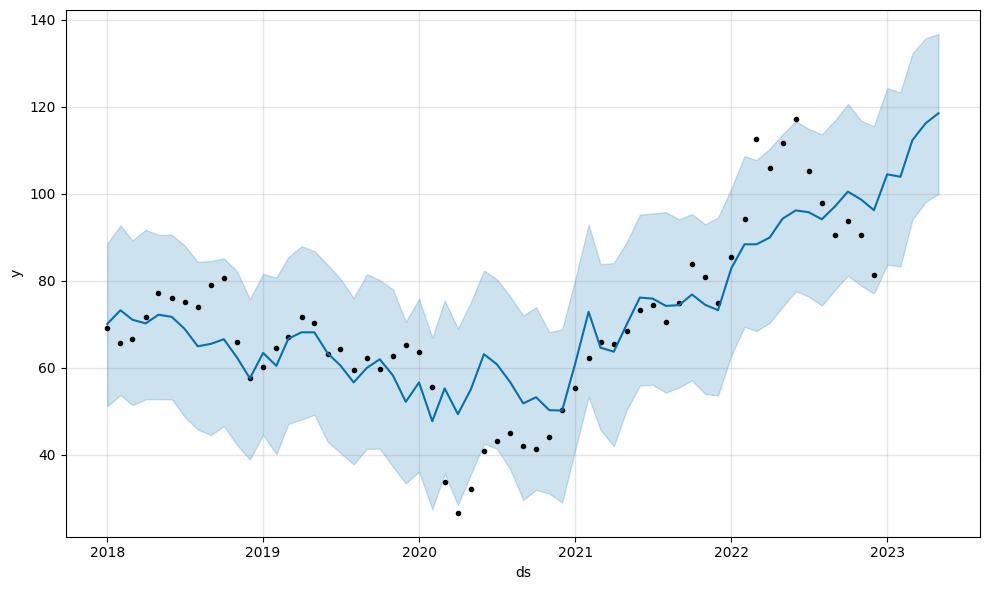

In [16]:
plot = model.plot(forecast)

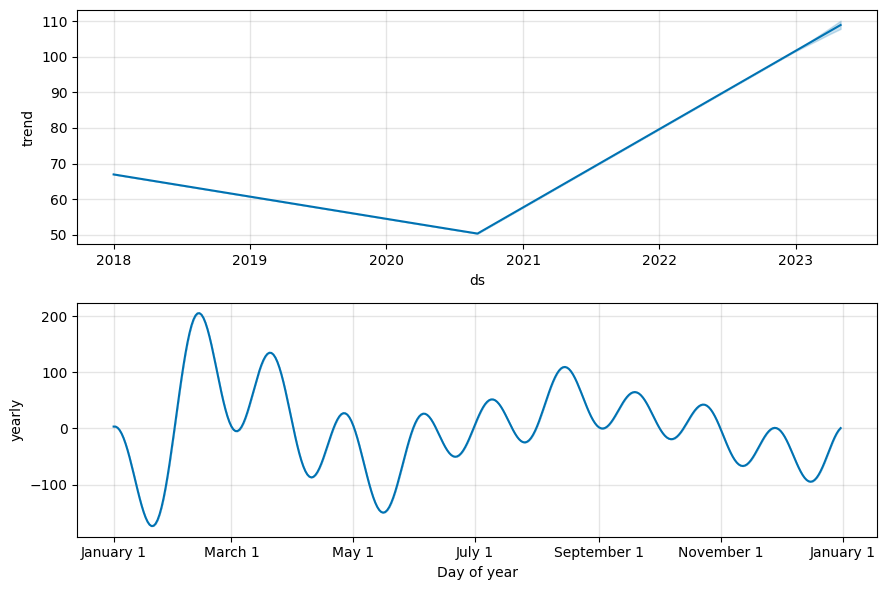

In [29]:
components_plot = model.plot_components(forecast)